Overview of statsmodels

statsmodels provides comprehensive statistical tests, data exploration tools, and model fitting techniques. It is widely used in econometrics, time series analysis, and hypothesis testing.

Key features:

Linear regression (OLS, WLS, GLS)

Generalized linear models (GLM)

Time series analysis (AR, ARMA, ARIMA, SARIMAX)

Statistical hypothesis testing

Robust models and diagnostics

3. Ordinary Least Squares (OLS) Regression

The most common use of statsmodels is for performing Ordinary Least Squares (OLS) regression.

In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Generate some sample data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Independent variable
y = 2.5 * X.squeeze() + np.random.randn(100) * 2  # Dependent variable with noise

# Convert X to DataFrame for better visualization
X_df = pd.DataFrame(X, columns=['Feature'])

# Add constant term (intercept) to the model
X_df = sm.add_constant(X_df)  # Adds a column of ones

# Fit the OLS model
model = sm.OLS(y, X_df).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1543.
Date:                Sat, 22 Mar 2025   Prob (F-statistic):           8.82e-62
Time:                        16:25:46   Log-Likelihood:                -200.46
No. Observations:                 100   AIC:                             404.9
Df Residuals:                      98   BIC:                             410.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4302      0.341      1.263      0.2

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


4. Interpreting OLS Summary Output

The model.summary() provides a detailed statistical report:

R-squared: Explains how much variance in y is explained by X.

F-statistic: Tests if the regression model is a good fit.

P-values: If p-value < 0.05, the predictor is statistically significant.

Confidence Intervals: The range where the true coefficient likely lies.

5. Checking Residuals & Assumptions

To validate our model, we should check residuals for assumptions like homoscedasticity and normality.

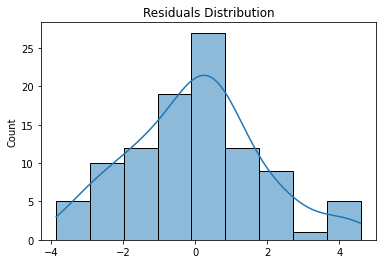

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals = model.resid

# Plot residuals histogram
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

6. Generalized Linear Models (GLM)

If you need models beyond linear regression (like Poisson, Logit, Probit), statsmodels provides Generalized Linear Models (GLM).

Example: Logistic Regression using GLM

In [4]:
from statsmodels.api import GLM
import statsmodels.api as sm

# Generate binary classification data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = (X.squeeze() + np.random.normal(0, 0.5, size=100) > 5).astype(int)  # Label is 1 if X > 5, else 0

# Convert X to DataFrame and add constant
X_df = pd.DataFrame(X, columns=['Feature'])
X_df = sm.add_constant(X_df)

# Fit a logistic regression model
logit_model = GLM(y, X_df, family=sm.families.Binomial()).fit()

# Print summary
print(logit_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7.5049
Date:                Sat, 22 Mar 2025   Deviance:                       15.010
Time:                        16:48:24   Pearson chi2:                     25.2
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.5289      8.884     -2.536      0.0

7. Time Series Analysis

statsmodels is widely used for time series modeling, such as:

Autoregression (AR)

Moving Average (MA)

Autoregressive Integrated Moving Average (ARIMA)

Seasonal ARIMA (SARIMAX)

Example: ARIMA Model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -127.244
Date:                Sat, 22 Mar 2025   AIC                            264.488
Time:                        17:01:34   BIC                            277.310
Sample:                             0   HQIC                           269.671
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0997      3.356     -0.030      0.976      -6.678       6.478
ar.L2          0.0139      3.095      0.004      0.996      -6.052       6.080
ma.L1          3.6917    122.745      0.030      0.9

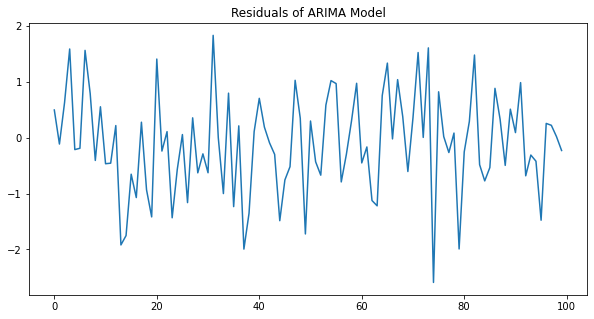

In [6]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Generate sample time series data
np.random.seed(42)
time_series_data = np.cumsum(np.random.randn(100))  # Cumulative sum to simulate trends

# Differencing to ensure stationarity
time_series_data_diff = np.diff(time_series_data)  # First-order differencing

# Fit an ARIMA model (AR=2, I=1, MA=2)
arima_model = ARIMA(time_series_data, order=(2, 1, 2), 
                     enforce_stationarity=False, enforce_invertibility=False)

arima_result = arima_model.fit()

# Print model summary
print(arima_result.summary())

# Plot residuals to check assumptions
plt.figure(figsize=(10, 5))
plt.plot(arima_result.resid)
plt.title("Residuals of ARIMA Model")
plt.show()


Key Improvements:

1.Applied first-order differencing (np.diff(time_series_data)) to help with stationarity.

2.Set enforce_stationarity=False and enforce_invertibility=False to let the model choose suitable parameters.

3.Plotted residuals to check for any model misfit.

8. Hypothesis Testing

statsmodels also provides functions for hypothesis testing.

In [7]:
#T-test
from scipy import stats

# Sample data
group1 = np.random.randn(30) + 1
group2 = np.random.randn(30) + 1.5

# Perform t-test
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -1.4817305574926876, P-value: 0.14382489063505027


Summary

1.OLS for linear regression

2.GLM for logistic and Poisson regression

3.Time series models like ARIMA

4.Hypothesis testing (T-tests, ANOVA, etc.)

5.Residual analysis for model validation